In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
!dir

sample_data  test.csv  train.csv


In [ ]:
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualisasi Data

## Simple Barchart 

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
count_sex = train['Sex'].value_counts()
index_sex = count_sex.index
value_sex = count_sex.values

In [ ]:
fig = plt.figure(figsize = (10, 5) )
plt.bar(index_sex, value_sex , color = "maroon",  width = 0.7) 

plt.show()

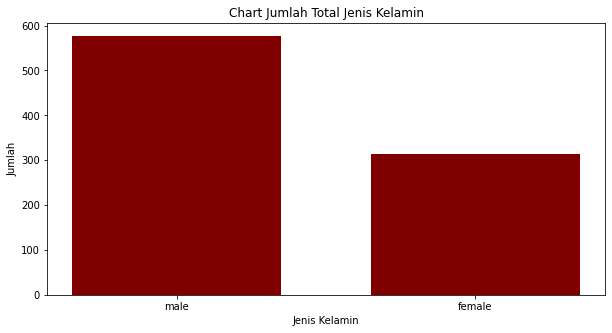

In [ ]:
fig = plt.figure(figsize = (10, 5) )
plt.bar(index_sex, value_sex , color = "maroon",  width = 0.7) 

plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.title("Chart Jumlah Total Jenis Kelamin")

plt.show()

In [ ]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index 
  values = count.values 

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.show()


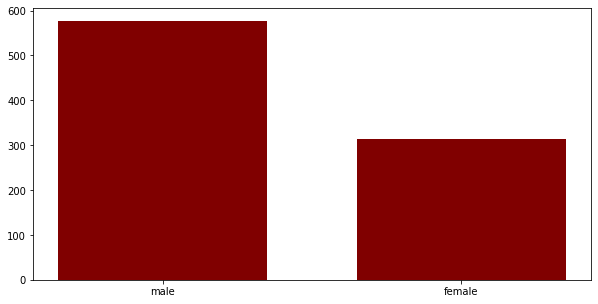

In [ ]:
bar_chart("Sex")

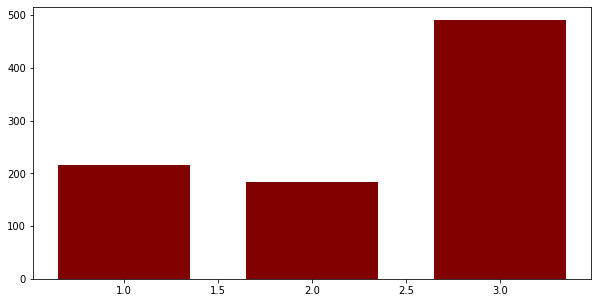

In [ ]:
bar_chart("Pclass")

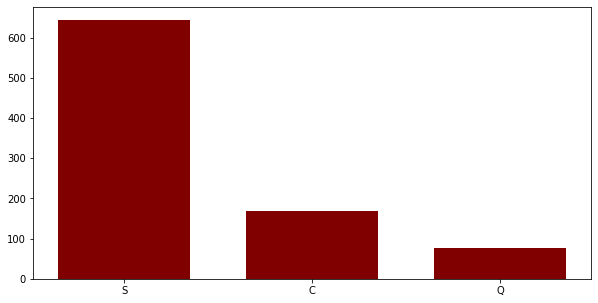

In [ ]:
bar_chart("Embarked")

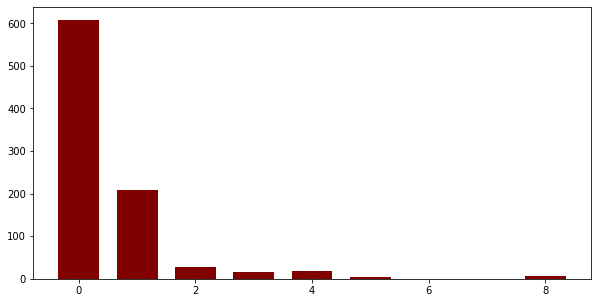

In [ ]:
bar_chart("SibSp")

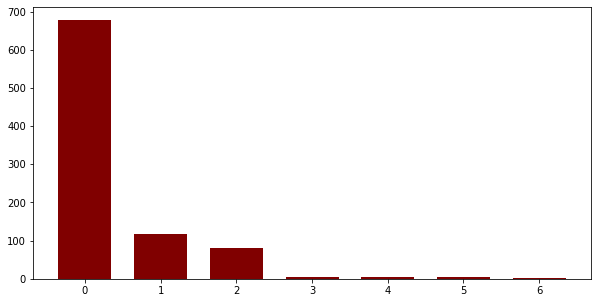

In [ ]:
bar_chart("Parch")

## Grouped Bar Chart / Clustered Bar Chart

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
survived_sex = train.groupby(['Survived', "Sex"]).count()['PassengerId'].reset_index()
survived_sex.head()

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [ ]:
def grouped_barchart(column): 
  survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = survived, kind = "bar", 
      x = "Survived", y = "PassengerId", hue = column, 
      palette = "dark" , height = 6
  )

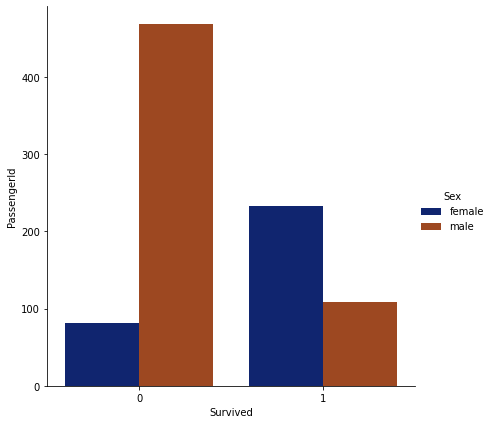

In [ ]:
grouped_barchart("Sex")

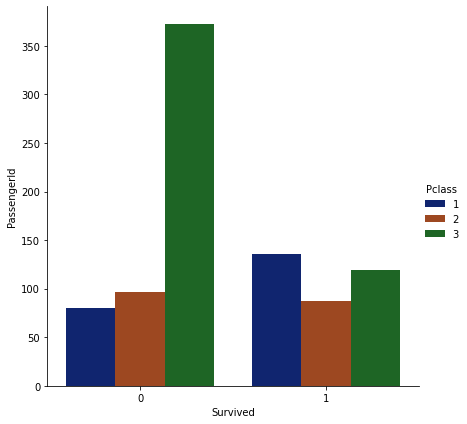

In [ ]:
grouped_barchart("Pclass")

## Histogram 

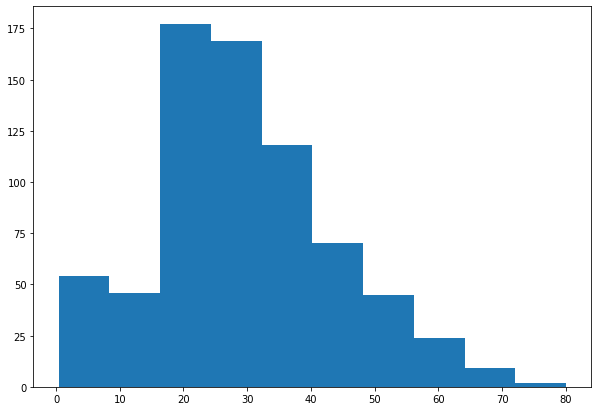

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Age)

plt.show()

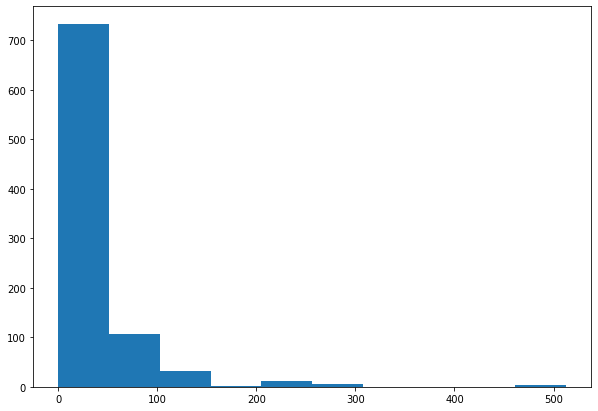

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Fare)

plt.show()

## KDE Plot (Kernel Density Estimate)

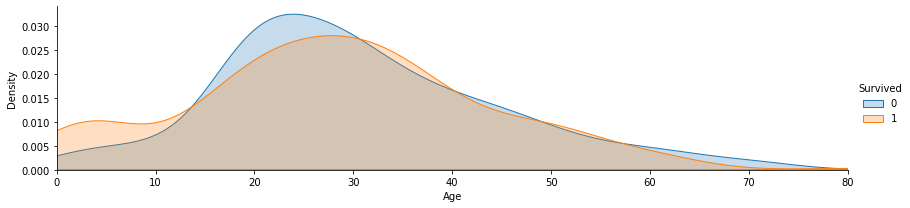

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

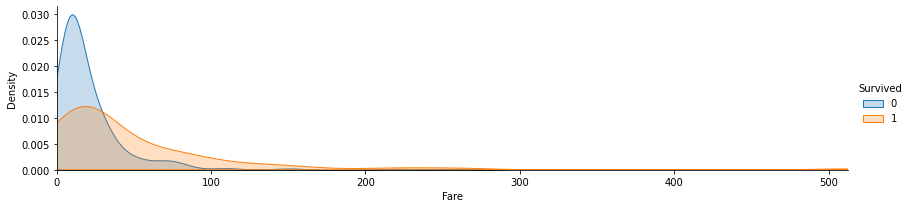

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 